In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression

### **Reading the Data**

In [3]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.shape

(1460, 81)

In [4]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### **EDA on the Train Data**

In [7]:
# identify columns with lower number of labels so that we can visualize on Graph
cols_low_labels = []
for i in train.columns:
    if(len(list(train[i].drop_duplicates()))<8):
        cols_low_labels.append(i)
cols_low_labels

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'YrSold',
 'SaleCondition']

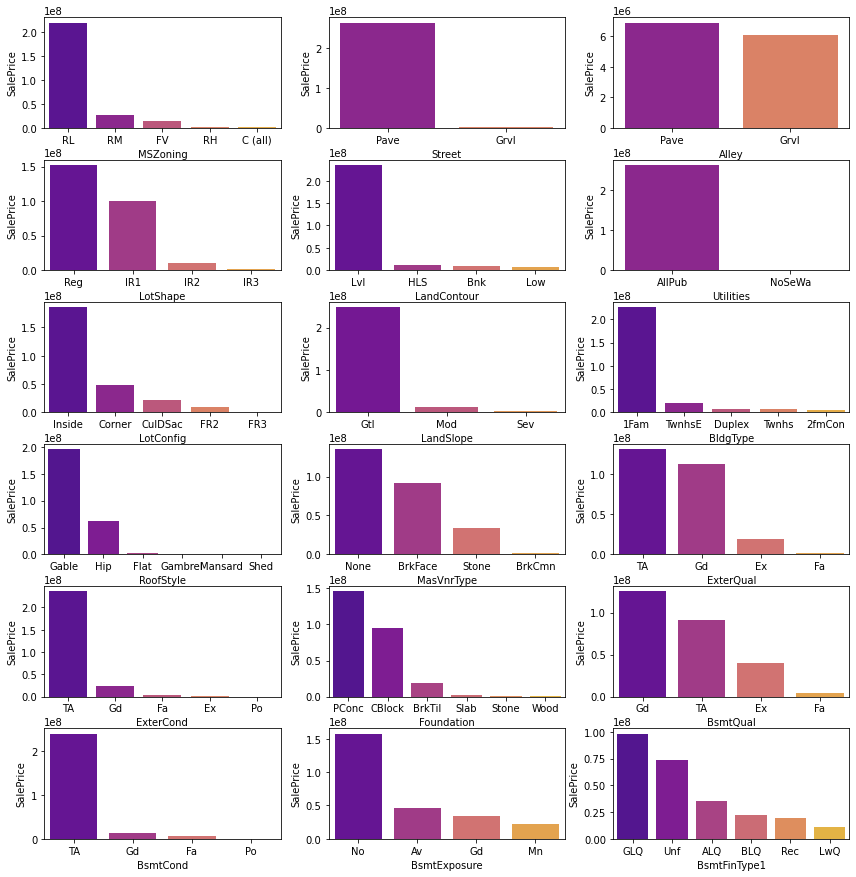

In [8]:
fig, ax = plt.subplots(6,3,figsize =(12,12))
fig.tight_layout()
row = 1
for col in train[cols_low_labels].columns[0:18]:
    plt.subplot(6,3,row)
    plt_data = train[['SalePrice', col]].groupby(col, as_index=False)['SalePrice'].sum().sort_values('SalePrice',ascending =False)
    sns.barplot(x = col, y = 'SalePrice', data= plt_data, palette ='plasma')
    row += 1

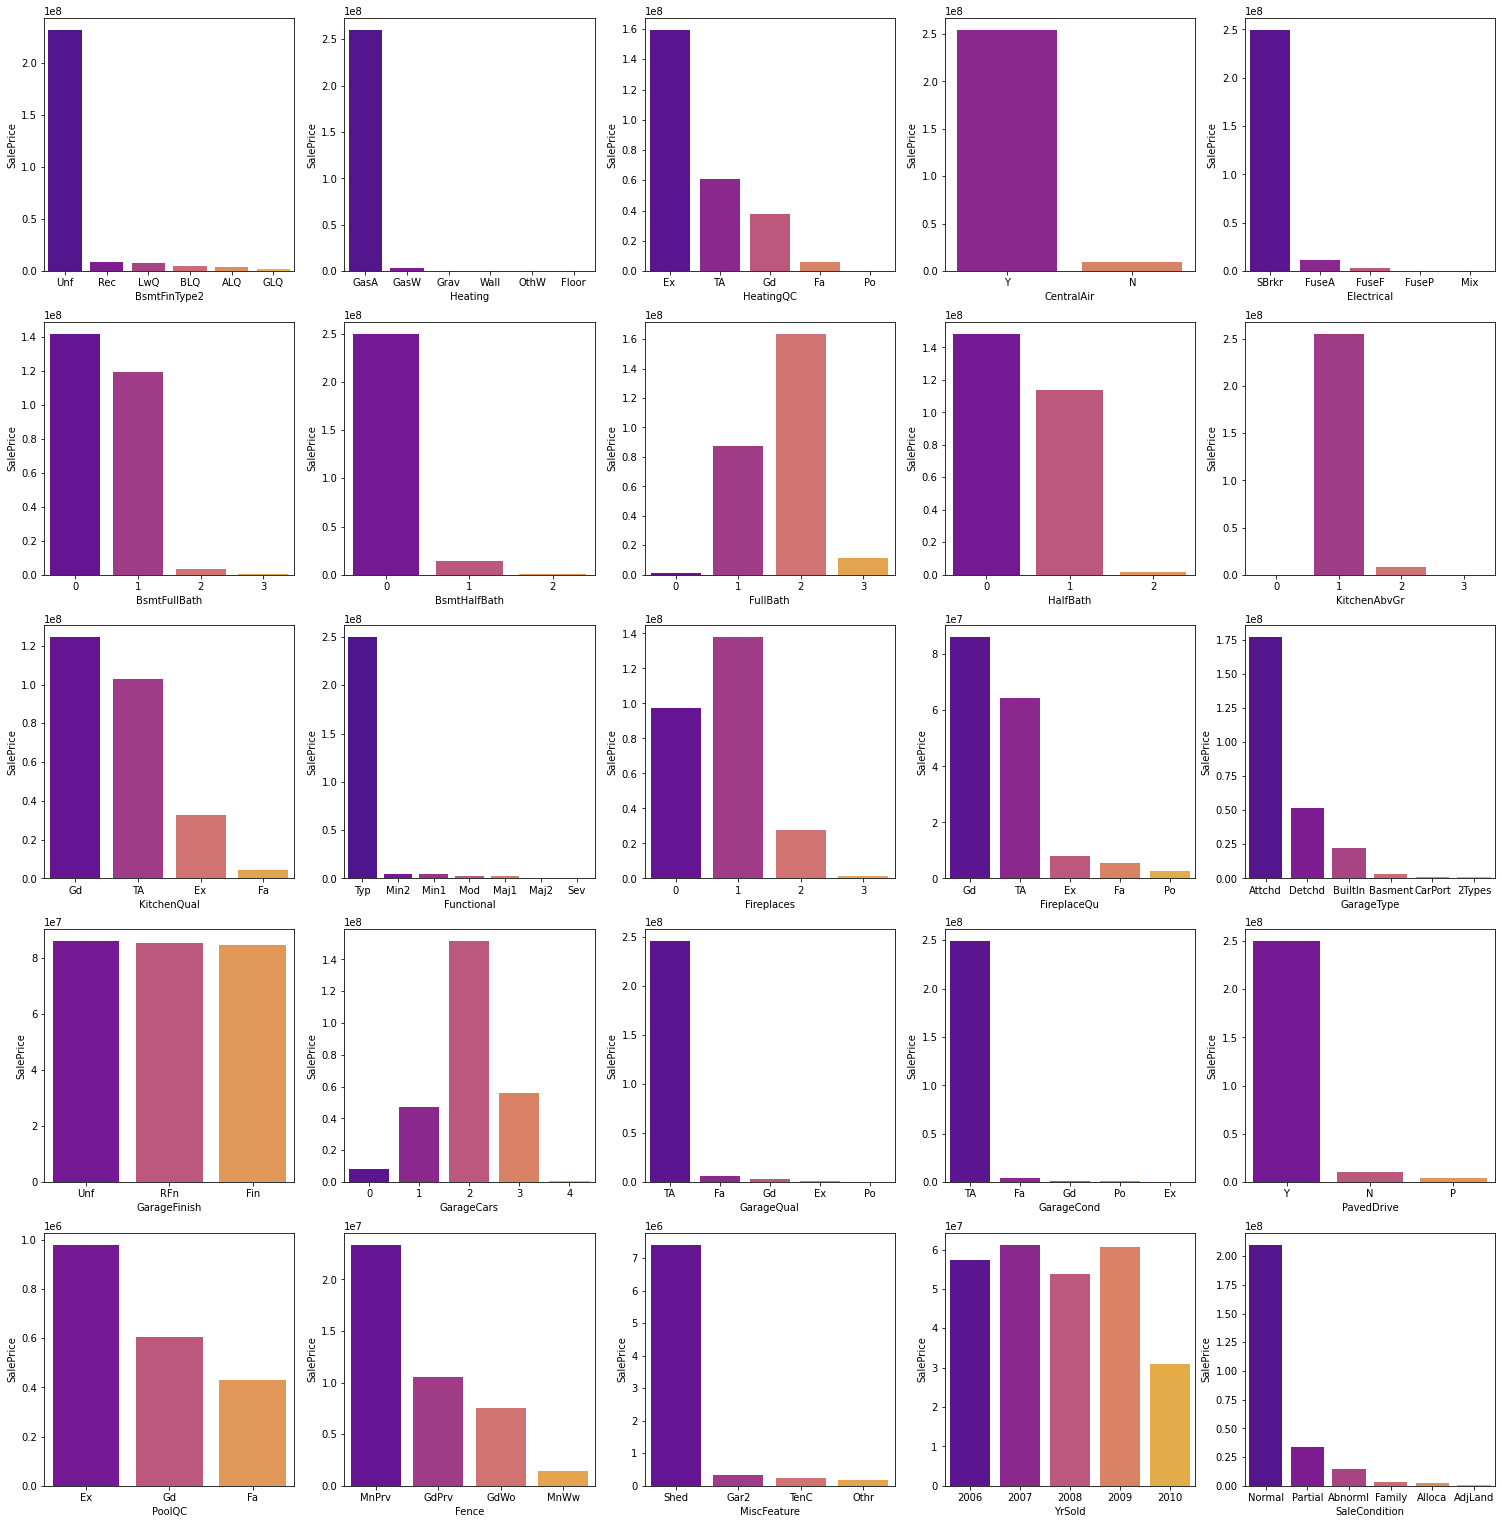

In [9]:
fig, ax = plt.subplots(6,4,figsize=(26,27))
row = 1
for col in train[cols_low_labels].columns[18:]:
    plt.subplot(5,5,row)
    plt_data = train[['SalePrice', col]].groupby(col, as_index=False)['SalePrice'].sum().sort_values('SalePrice',ascending =False)
    sns.barplot(x = col, y = 'SalePrice', data= plt_data, palette ='plasma')
    
    row += 1

Visualize different variables in the Same Chart

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


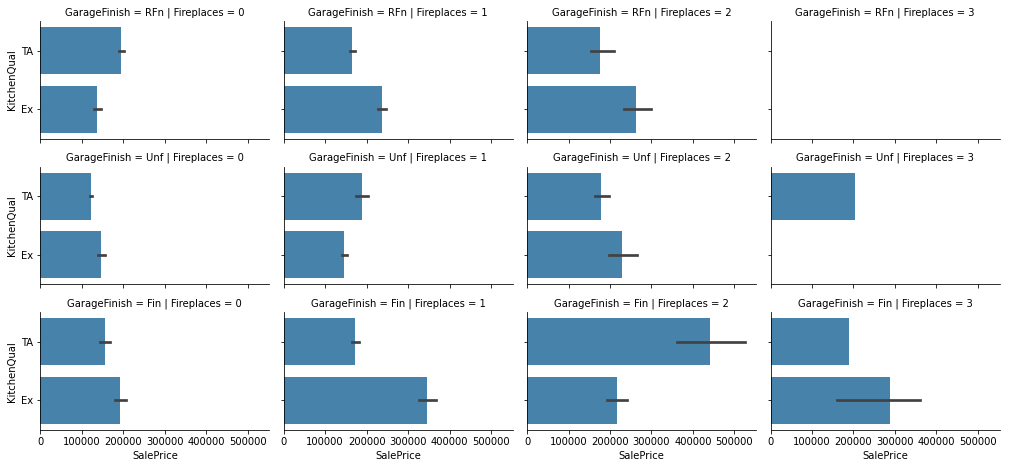

In [10]:
grid = sns.FacetGrid(train, row='GarageFinish', col='Fireplaces', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'SalePrice', 'KitchenQual',alpha=.9).add_legend()

Houses with 2 Fireplaces and Average Kitchen Quality is having higher Sales price (Chart-11) than others which gives us the hint that Overall facilities matter while one purchase a house, it is not like if Kitchen have high Quality and others facilities are less than also price is higher. The analysis is aligned as per general understanding while somebody purchase a house. 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


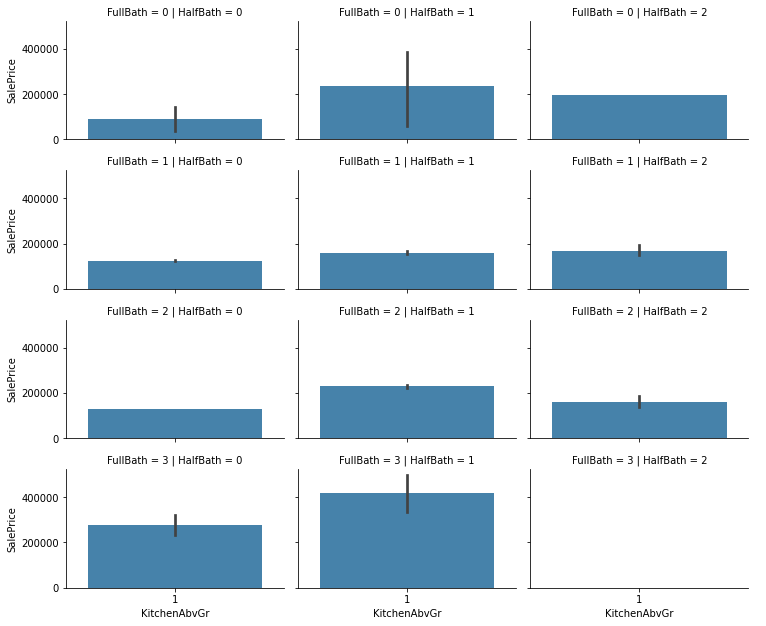

In [11]:
grid = sns.FacetGrid(train, row='FullBath', col='HalfBath', height=2.2, aspect=1.6)
grid.map(sns.barplot ,'KitchenAbvGr', 'SalePrice',alpha=.9).add_legend()

Higher the area + Bathrooms higher the Prices of the House (Chart-11).

And as you ca see these variable have a impact on the Sales Price, they should be helpful in Predicting the Sales Prices for the Test houses.